## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Shareability potential

In [1]:
import os
import pandas as pd
%load_ext autoreload
%autoreload 2
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __make the config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 

In [28]:
params.gammdist.shape = 2
params.gammdist.scale = 500
params.gamma_imp.shape = 1.15
params.gamma_imp.scale = 3200
params.nP = 200
params.nCenters = 3
params.city = 'Amsterdam, Netherlands'
params.t0 = '17:00'
params = ExMAS.utils.make_paths(params)
ExMAS.utils.save_config(params, path = 'ExMAS/data/configs/potential.json')

In [30]:
params.t0 = pd.to_datetime(params.t0)

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [7]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [31]:
inData = ExMAS.utils.synthetic_demand_poly_II(inData, params)

4. __save requests__ 

In [35]:
inData.requests.to_csv('ExMAS/spinoffs/poly_demand.csv')

5. __load requests__ 

In [36]:
inData.requests = pd.read_csv('ExMAS/spinoffs/poly_demand.csv', index_col = 0)
inData.requests.treq = pd.to_datetime(inData.requests.treq)
inData.requests['pax_id'] = inData.requests.index.copy()
inData.requests.tarr = pd.to_datetime(inData.requests.tarr)
inData.requests.ttrav = pd.to_timedelta(inData.requests.ttrav)

5. __visualize demand__ 

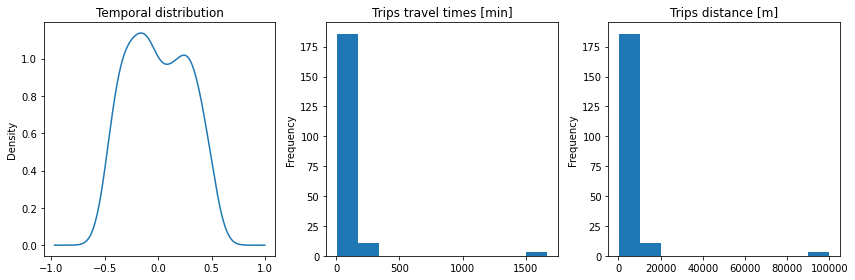

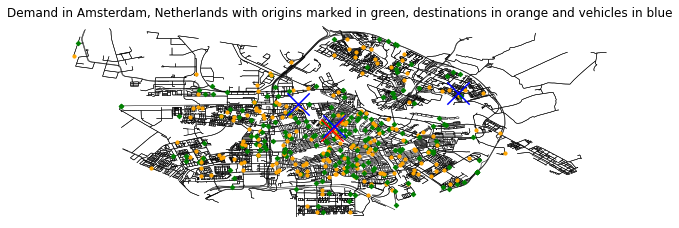

In [37]:
ExMAS.utils.plot_demand_poly(inData, params)

### run

21-09-20 11:49:05-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
21-09-20 11:49:05-INFO-creating combinations
21-09-20 11:49:05-INFO-39800	 nR*(nR-1)
21-09-20 11:49:05-INFO-16296	departure compatibility
21-09-20 11:49:06-INFO-7051	origins shareability
21-09-20 11:49:06-INFO-1465	utility for i
21-09-20 11:49:06-INFO-278	utility for j
21-09-20 11:49:07-INFO-384	LIFO pairs
21-09-20 11:49:07-INFO-Reduction of feasible pairs by 99.04%


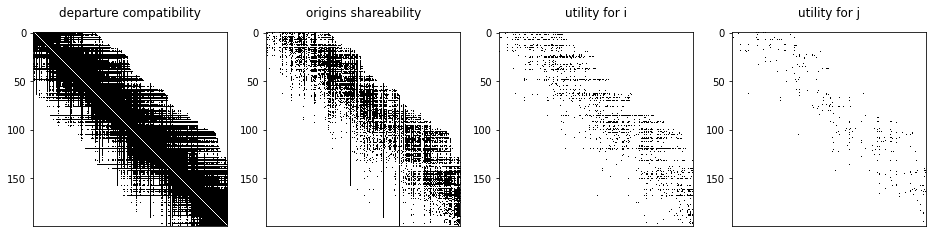

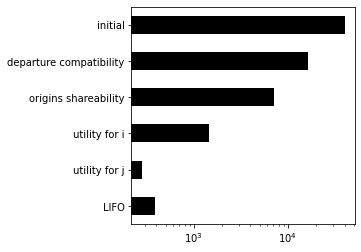

21-09-20 11:49:08-INFO-Degree 2 	Completed
21-09-20 11:49:08-INFO-trips to extend at degree 2 : 662
21-09-20 11:49:08-INFO-At degree 2 feasible extensions found out of 173 searched
21-09-20 11:49:08-INFO-Degree 3 	Completed
21-09-20 11:49:08-INFO-trips to extend at degree 3 : 173
21-09-20 11:49:09-INFO-At degree 3 feasible extensions found out of 13 searched
21-09-20 11:49:09-INFO-Degree 4 	Completed
21-09-20 11:49:09-INFO-trips to extend at degree 4 : 13
21-09-20 11:49:09-INFO-At degree 4 feasible extensions found out of 0 searched
21-09-20 11:49:09-INFO-Degree 5 	Completed
21-09-20 11:49:09-INFO-No more trips to exted at degree 5
21-09-20 11:49:09-INFO-Matching 200 trips to 1048 rides in order to minimize u_veh


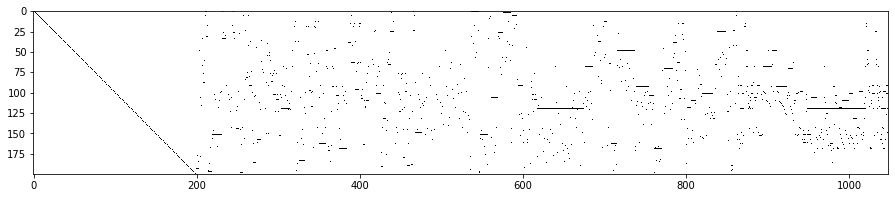

21-09-20 11:49:10-INFO-Problem solution: Optimal. 
Total costs for single trips:        152,867 
reduced by matching to:              120,817
21-09-20 11:49:10-INFO-Calculations  completed
21-09-20 11:49:10-INFO-DotMap(VehHourTrav=120112, VehHourTrav_ns=152867, PassHourTrav=165371, PassHourTrav_ns=152867, PassUtility=2218.52275, PassUtility_ns=2370.493, mean_lambda=0.3067660824870546, revenue_s=160510.34999999998, revenue_ns=229300.5, Fare_Discount=-0.3000000000000001, nR=200, SINGLE=93, PAIRS=47, TRIPLES=3, QUADRIPLES=1, QUINTETS=0, PLUS5=0, shared_ratio=0.5349999999999999, fleet_size_nonshared=42.0, fleet_size_shared=35.0, lambda_shared=0.3067660824870546)


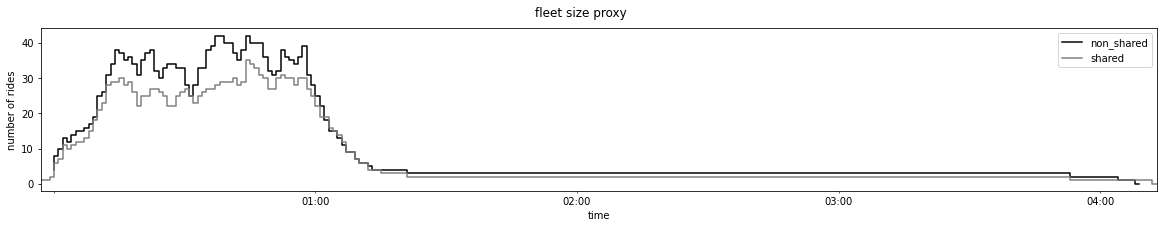

In [38]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [39]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,120112,total travel time of vehicles (with travellers...
VehHourTrav_ns,152867,as above yet in non-shared scenarion
PassHourTrav,165371,total travel time of passengers
PassHourTrav_ns,152867,as above yet in non-shared scenarion
PassUtility,2218.52,total (dis)utility of passengers
PassUtility_ns,2370.49,as above yet in non-shared scenarion
mean_lambda,0.306766,mean vehicle cost reduction (lambda) over shar...
revenue_s,160510,total fares paid by travellers sharing
revenue_ns,229300,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


In [43]:
inData.sblts.requests.sample(10)

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
122,74,46488199,46414736,2237,NaN,388,2020-09-21 17:59:56,NaN,3107,74,0.0035,217.747253,6.0185,999999,122,388,6.018500,1,0
49,93,46252338,46439952,910,NaN,1702,2020-09-21 20:32:59,NaN,13617,93,0.0035,953.967033,26.3825,999999,1024,2325,25.654650,32,0
69,68,46293876,420259803,1290,NaN,827,2020-09-21 18:42:41,NaN,6619,68,0.0035,463.780220,12.8230,999999,415,855,11.427150,20,1
132,116,4530306645,1474954865,2335,NaN,962,2020-09-21 19:18:03,NaN,7696,116,0.0035,539.142857,14.9110,999999,382,1140,14.091350,20,0
123,26,46486926,2021881804,2248,NaN,800,2020-09-21 18:55:05,NaN,6405,26,0.0035,448.846154,12.4075,999999,297,900,11.698400,20,0
67,42,1474954865,46246905,1275,NaN,348,2020-09-21 17:38:32,NaN,2785,42,0.0035,195.131868,5.3955,999999,67,348,5.395500,1,0
90,57,46568430,679674632,1651,NaN,1369,2020-09-21 20:00:56,NaN,10953,57,0.0035,767.340659,21.2210,999999,819,1498,18.600925,21,0
169,2,46426435,4119470844,3010,NaN,258,2020-09-21 17:55:30,NaN,2068,2,0.0035,144.989011,4.0050,999999,169,258,4.005000,1,0
17,78,46418578,2613311559,410,NaN,620,2020-09-21 18:00:23,NaN,4961,78,0.0035,347.571429,9.6115,999999,17,620,9.611500,1,0
168,178,46354426,46483277,2919,NaN,1473,2020-09-21 20:35:56,NaN,11785,178,0.0035,825.626374,22.8330,999999,382,1837,21.624400,20,1


In [46]:
inData.sblts.schedule[inData.sblts.schedule.kind>1].sample(10)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
1024,"[49, 65, 98]",47.29410,2325,32,"[25.654649999999997, 13.876099999999997, 7.76335]","[595.0, 984, 636, 502, 119, 84]","[49, 65, 98]","[65, 98, 49]",3,1024,0.261436,3148,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1033,"[26, 60, 66]",44.16405,1989,30,"[19.96575, 10.23435, 13.963949999999999]","[676.0, 408, 275, 484, 541, 281]","[26, 60, 66]","[60, 26, 66]",3,1033,0.320929,2929,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
370,"[41, 46]",20.69375,1021,20,"[10.781225, 9.912524999999999]","[729.5, 222, 638, 146]","[41, 46]","[41, 46]",2,370,0.314305,1489,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
850,"[59, 80]",16.69710,944,21,"[11.478774999999999, 5.218325]","[1276.5, 130, 343, 456]","[59, 80]","[80, 59]",2,850,0.146474,1106,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
463,"[163, 188]",15.09270,1049,20,"[7.673224999999999, 7.419474999999999]","[2900.5, 375, 274, 385]","[163, 188]","[163, 188]",2,463,0.026902,1078,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
298,"[77, 109]",25.28330,983,20,"[12.632549999999998, 12.650749999999999]","[1704.0, 92, 840, 36]","[77, 109]","[77, 109]",2,298,0.431134,1728,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
593,"[84, 102]",11.75370,611,21,"[7.798174999999999, 3.9555249999999997]","[1713.5, 157, 261, 178]","[84, 102]","[102, 84]",2,593,0.225602,789,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
233,"[27, 34]",21.27545,1023,20,"[11.072424999999999, 10.203025]","[581.5, 180, 699, 129]","[27, 34]","[27, 34]",2,233,0.344231,1560,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
560,"[0, 7]",13.13690,823,21,"[9.649325, 3.4875749999999996]","[-124.5, 383, 225, 200]","[0, 7]","[7, 0]",2,560,0.043023,860,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",1
297,"[123, 103]",22.97155,979,20,"[11.6984, 11.273149999999998]","[2055.0, 166, 734, 64]","[123, 103]","[123, 103]",2,297,0.386976,1597,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


---
(c) Rafał Kucharski, Delft, 2020